In [1]:
import cv2
import numpy as np
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, BatchNormalization, AveragePooling2D, Input, Conv2D, UpSampling2D
from keras.layers import Convolution2D
from keras.models import Sequential, load_model, Model
import pickle
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import keras

In [2]:
noise_X = np.load('/content/drive/MyDrive/model/noise_X.npy')
clean_Y = np.load('/content/drive/MyDrive/model/clean_Y.npy')

noise_X = noise_X.astype('float32')
noise_X = noise_X/255
clean_Y = clean_Y.astype('float32')
clean_Y = clean_Y/255

indices = np.arange(noise_X.shape[0])
np.random.shuffle(indices)
noise_X = noise_X[indices]
clean_Y = clean_Y[indices]

print(noise_X.shape)
print(clean_Y.shape)
X_train, X_test, y_train, y_test = train_test_split(noise_X, clean_Y, test_size=0.2) #split dataset into train and test

(300, 256, 256, 3)
(300, 256, 256, 3)


In [22]:
import os
model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256,256,3)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        Conv2D(3, (3, 3), activation='sigmoid', padding='same') # Output has the same number of channels as input
    ])
model.compile(optimizer='adam', loss='mean_squared_error')
if os.path.exists("/content/drive/MyDrive/model/noise_detect_clean.keras") == False:
    model_check_point = ModelCheckpoint(filepath='/content/drive/MyDrive/model/noise_detect_clean.keras', verbose = 1, save_best_only = True)
    hist = model.fit(X_train, y_train, batch_size = 32, epochs = 300, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
    f = open('/content/drive/MyDrive/model/noise_detect_clean.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()
else:
    model.load_weights("/content/drive/MyDrive/model/noise_detect_clean.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


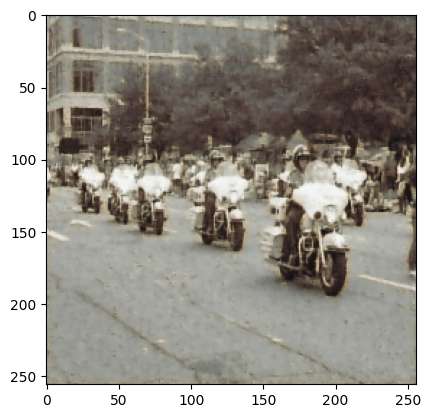

In [27]:
import matplotlib.pyplot as plt
test = cv2.imread("/content/noisy_236641496_40cf8ed020_c.jpg")
test = cv2.resize(test, (256, 256))
temp = []
temp.append(test)
test = np.asarray(temp)
test = test.astype('float32')
test = test/255
predict = model.predict(test)
predict = predict[0]
predict = cv2.resize(predict, (256, 256))
predict = cv2.cvtColor(predict, cv2.COLOR_BGR2RGB)
plt.imshow(predict)
plt.show()

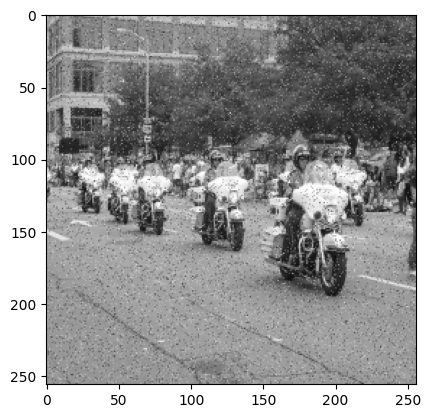

In [28]:
test = cv2.imread("/content/noisy_236641496_40cf8ed020_c.jpg")
test = cv2.resize(test, (256, 256))
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
plt.imshow(test)
plt.show()

In [37]:
import random
def add_noise(img):

    # Getting the dimensions of the image
    row , col = img.shape

    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to white
        img[y_coord][x_coord] = 255

    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to black
        img[y_coord][x_coord] = 0

    return img

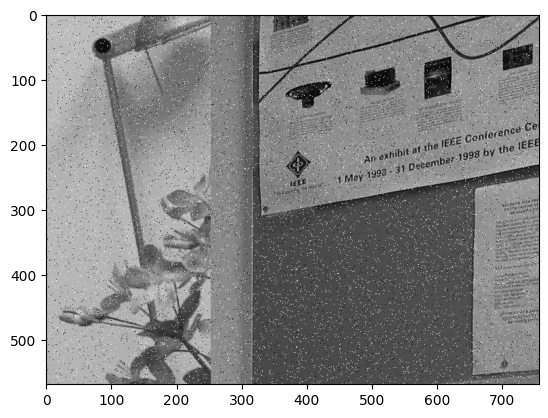

In [41]:
img = cv2.imread("/content/canong3_canonxt_sub_03.tif", 0)
img = add_noise(img)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


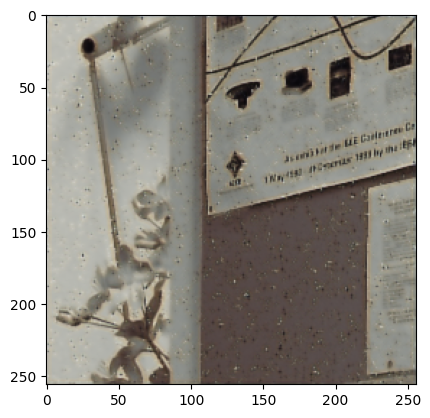

In [43]:
cv2.imwrite("/content/3.tif", img)
test = cv2.imread("/content/3.tif")
test = cv2.resize(test, (256, 256))
temp = []
temp.append(test)
test = np.asarray(temp)
test = test.astype('float32')
test = test/255
predict = model.predict(test)
predict = predict[0]
predict = cv2.resize(predict, (256, 256))
predict = cv2.cvtColor(predict, cv2.COLOR_BGR2RGB)
plt.imshow(predict)
plt.show()